In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model

plt.style.use('ggplot')

In [3]:
train_df = pd.read_csv('/home/bill/ncaaf/model_training/preseason_model/temp/train_df.csv', index_col=0)

In [4]:
train_df.head(5)

,id,date,short_name,away_team_id,home_team_id,team_id_away,play_success_off_FY_away,yards_per_play_off_FY_away,play_success_def_FY_away,yards_per_play_def_FY_away,...,yards_per_play_def_FY_home,play_success_off_FY-1_home,yards_per_play_off_FY-1_home,play_success_def_FY-1_home,yards_per_play_def_FY-1_home,play_success_off_FY-2_home,yards_per_play_off_FY-2_home,play_success_def_FY-2_home,yards_per_play_def_FY-2_home,home_score_differential
7771,401256138,2020-12-23,LT @ GASO,2348,290,2348,0.42,5.99,0.415,5.495,...,5.895,0.365,6.305,0.430,5.050,0.370,4.580,0.420,6.340,35
3817,401234652,2020-11-29,DUKE @ GT,150,59,150,0.32,4.13,0.400,5.390,...,5.550,0.460,5.415,0.480,6.200,0.430,5.770,0.420,5.505,23
8235,401236013,2020-10-31,TCU @ BAY,2628,239,2628,0.39,5.42,0.370,5.170,...,5.000,0.435,5.625,0.415,5.595,0.365,5.370,0.430,5.610,-10
4158,401234661,2020-12-12,UNC @ MIAMI,153,2390,153,0.42,5.88,0.380,5.610,...,4.720,0.380,5.370,0.365,4.540,0.395,5.705,0.385,4.655,-36
6882,401236032,2020-11-28,TTU @ OKST,2641,197,2641,0.43,5.89,0.440,6.600,...,5.300,0.450,5.800,0.425,5.915,0.440,7.280,0.390,5.250,6


In [5]:
lr_predictions = pd.read_csv('/home/bill/ncaaf/batch_prediction/prediction_file/predictions.csv', index_col=0)

/tmp/ipykernel_15018/1129435873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_predictions['home_score_differential'].ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_15018/1129435873.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), labe

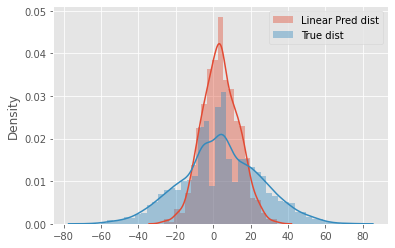

In [6]:
sns.distplot(lr_predictions['home_score_differential'].ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

In [7]:
x_train = train_df[['play_success_off_FY_away',
    'yards_per_play_off_FY_away',
    'play_success_def_FY_away',
    'yards_per_play_def_FY_away',
    'play_success_off_FY-1_away',
    'yards_per_play_off_FY-1_away',
    'play_success_def_FY-1_away',
    'yards_per_play_def_FY-1_away',
    'play_success_off_FY-2_away',
    'yards_per_play_off_FY-2_away',
    'play_success_def_FY-2_away',
    'yards_per_play_def_FY-2_away',
    'play_success_off_FY_home',
    'yards_per_play_off_FY_home',
    'play_success_def_FY_home',
    'yards_per_play_def_FY_home',
    'play_success_off_FY-1_home',
    'yards_per_play_off_FY-1_home',
    'play_success_def_FY-1_home',
    'yards_per_play_def_FY-1_home',
    'play_success_off_FY-2_home',
    'yards_per_play_off_FY-2_home',
    'play_success_def_FY-2_home',
    'yards_per_play_def_FY-2_home']]

y_train = train_df['home_score_differential']

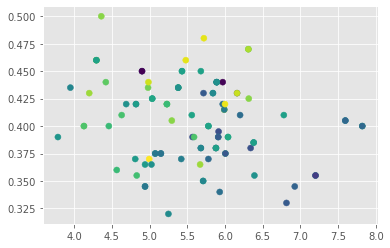

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[:100,1], x_train.iloc[:100,2], c=y_train[:100])
plt.show()

/tmp/ipykernel_15018/3131296572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist', bins=100)


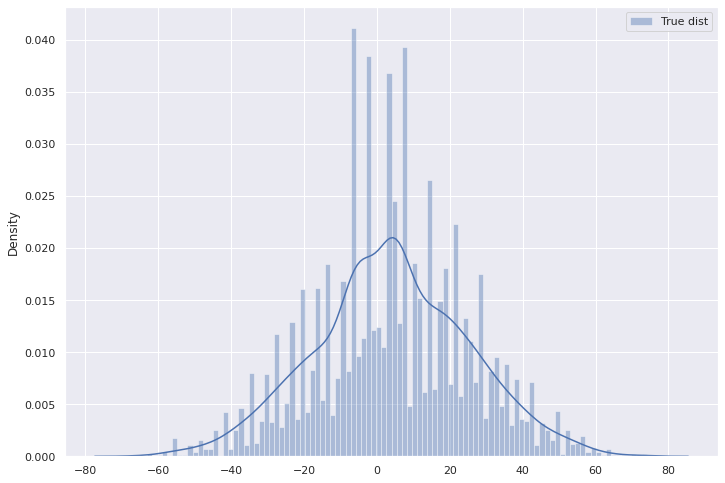

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist', bins=100)
plt.legend()

In [320]:
model = KernelRidge(kernel = 'rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

/tmp/ipykernel_11674/4057251251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/4057251251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


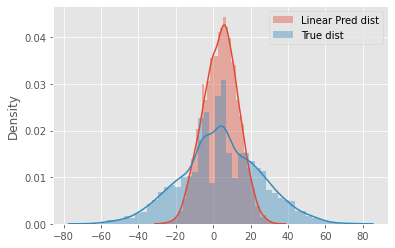

In [321]:
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

In [322]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(x_train, y_train)
#gm.means_
gm.predict(x_train)

array([0, 0, 0, ..., 0, 1, 0])

/tmp/ipykernel_11674/366514967.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/366514967.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


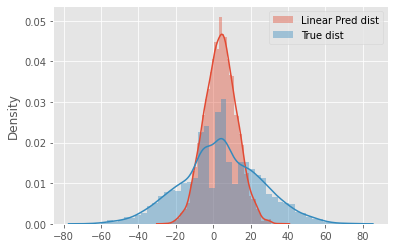

In [323]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)

sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

/tmp/ipykernel_11674/2671554217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/2671554217.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


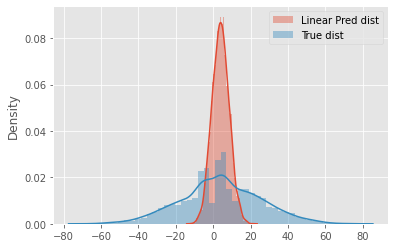

In [324]:
regr = linear_model.ElasticNet(random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

/tmp/ipykernel_11674/4041242018.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/4041242018.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


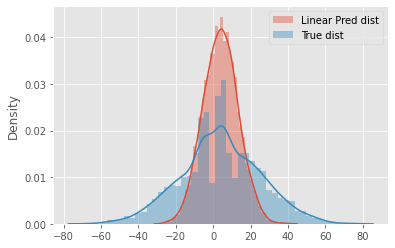

In [325]:
regr = linear_model.BayesianRidge()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

/tmp/ipykernel_11674/2699224104.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/2699224104.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


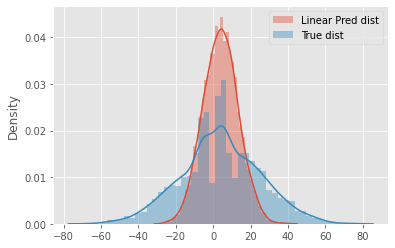

In [326]:
regr = linear_model.BayesianRidge()
init = [10000, 0.001]
regr.set_params(alpha_init=init[0], lambda_init=init[1])
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

/tmp/ipykernel_11674/904055666.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/904055666.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


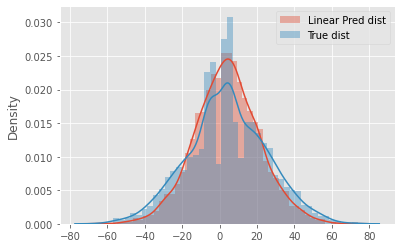

In [327]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
model = model.fit(x_train, y_train)
y_pred = model.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

In [328]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = PolynomialFeatures(interaction_only=True).fit_transform(x_train).astype(int)
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(x_train, y_train)

/tmp/ipykernel_11674/4030251271.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/4030251271.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


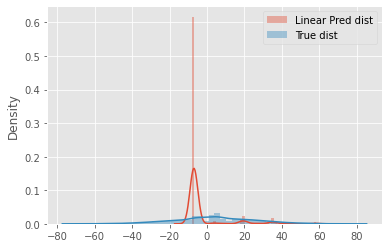

In [329]:
y_pred = clf.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

/tmp/ipykernel_11674/474357469.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/474357469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


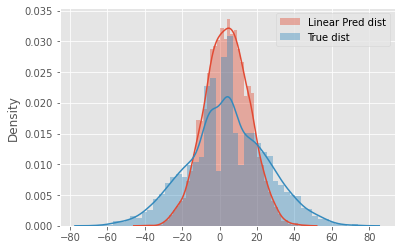

In [330]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

/tmp/ipykernel_11674/3975148802.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/3975148802.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


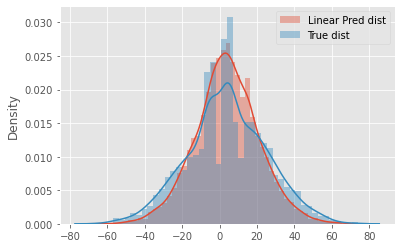

In [331]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

In [332]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_features = x_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=0)

170/170 [==============================] - 0s 2ms/step


/tmp/ipykernel_11674/3433481494.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/3433481494.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


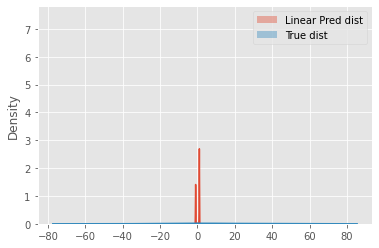

In [333]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_features = x_train.shape[1]
# define model
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(n_features,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='tanh'))

# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=0)

y_pred = model.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

In [334]:
tf.test.is_gpu_available()
tf.executing_eagerly()

True

In [335]:
# Build model
def get_model(h=16, lr=0.001):
    input = tf.keras.layers.Input(shape=(24,))
    x = tf.keras.layers.Dense(h, activation='tanh')(input)
    x = tf.keras.layers.Dense(1, activation=None)(x)
    model = tf.keras.models.Model(input, x)
    # Use Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse', metrics=['acc'])
    #model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

170/170 [==============================] - 0s 2ms/step


/tmp/ipykernel_11674/1690587253.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')
/tmp/ipykernel_11674/1690587253.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')


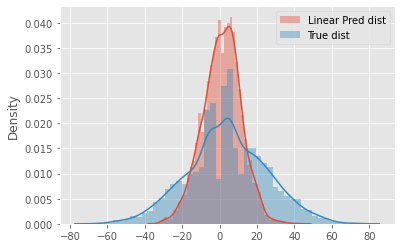

In [336]:
# Load and train the network
model = get_model(h=50)
epochs=1000
# Change verbosity (e.g verbose=1) to view the training progress
history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

y_pred = model.predict(x_train)
sns.distplot(y_pred.ravel(), label = 'Linear Pred dist')      
sns.distplot(train_df['home_score_differential'].ravel(), label = 'True dist')
plt.legend()

In [337]:
"""# In our toy example, we have single input feature
l = len(list(x_train))
# Number of gaussians to represent the multimodal distribution
k = 10
# Network
input = tf.keras.Input(shape=(l,))
layer = tf.keras.layers.Dense(50, activation='tanh', name='baselayer')(input)
mu = tf.keras.layers.Dense((l * k), activation=None, name='mean_layer')(layer)
# variance (should be greater than 0 so we exponentiate it)
var_layer = tf.keras.layers.Dense(k, activation=None, name='dense_var_layer')(layer)
var = tf.keras.layers.Lambda(lambda x: tf.math.exp(x), output_shape=(k,), name='variance_layer')(var_layer)
# mixing coefficient should sum to 1.0
pi = tf.keras.layers.Dense(k, activation='softmax', name='pi_layer')(layer)"""

"# In our toy example, we have single input feature\nl = len(list(x_train))\n# Number of gaussians to represent the multimodal distribution\nk = 10\n# Network\ninput = tf.keras.Input(shape=(l,))\nlayer = tf.keras.layers.Dense(50, activation='tanh', name='baselayer')(input)\nmu = tf.keras.layers.Dense((l * k), activation=None, name='mean_layer')(layer)\n# variance (should be greater than 0 so we exponentiate it)\nvar_layer = tf.keras.layers.Dense(k, activation=None, name='dense_var_layer')(layer)\nvar = tf.keras.layers.Lambda(lambda x: tf.math.exp(x), output_shape=(k,), name='variance_layer')(var_layer)\n# mixing coefficient should sum to 1.0\npi = tf.keras.layers.Dense(k, activation='softmax', name='pi_layer')(layer)"

In [338]:
"""model = tf.keras.models.Model(input, [pi, mu, var])
optimizer = tf.keras.optimizers.Adam()
model.summary()"""

'model = tf.keras.models.Model(input, [pi, mu, var])\noptimizer = tf.keras.optimizers.Adam()\nmodel.summary()'

In [340]:
"""def calc_pdf(y, mu, var):"""
    """Calculate component density"""
    """value = tf.subtract(y, mu)**2
    value = (1/tf.math.sqrt(2 * np.pi * var)) * tf.math.exp((-1/(2*var)) * value)
    
    return value

def mdn_loss(y_true, pi, mu, var):"""
    """MDN Loss Function
    The eager mode in tensorflow 2.0 makes is extremely easy to write 
    functions like these. It feels a lot more pythonic to me.
    """
    """out = calc_pdf(y_true, mu, var)
    # multiply with each pi and sum it
    out = tf.multiply(out, pi)
    out = tf.reduce_sum(out, 1, keepdims=True)
    out = -tf.math.log(out + 1e-10)
    
    return tf.reduce_mean(out)

# Numpy version
def pdf_np(y, mu, var):
    
    n = np.exp((-(y-mu)**2)/(2*var))
    d = np.sqrt(2 * np.pi * var)
    
    return n/d"""

IndentationError: unexpected indent (2131265375.py, line 2)

In [341]:
"""calc_pdf(np.array([3.0]), np.array([0.0, 0.1, 0.2]), np.array([1.0, 2.2, 3.3])).numpy()
pdf_np(3.0, np.array([0.0, 0.1, 0.2]), np.array([1.0, 2.2, 3.3]))"""

'calc_pdf(np.array([3.0]), np.array([0.0, 0.1, 0.2]), np.array([1.0, 2.2, 3.3])).numpy()\npdf_np(3.0, np.array([0.0, 0.1, 0.2]), np.array([1.0, 2.2, 3.3]))'

In [342]:
"""mdn_loss(
    np.array([3.0, 1.1]).reshape(2,-1).astype('float64'), 
    np.array([[1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]).reshape(2,-1).astype('float64'), 
    np.array([[0.0, 0.1, 0.2], [0.0, 0.1, 0.2]]).reshape(2,-1).astype('float64'), 
    np.array([[1.0, 2.2, 3.3], [1.0, 2.2, 3.3]]).reshape(2,-1).astype('float64')
).numpy()"""

"mdn_loss(\n    np.array([3.0, 1.1]).reshape(2,-1).astype('float64'), \n    np.array([[1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]).reshape(2,-1).astype('float64'), \n    np.array([[0.0, 0.1, 0.2], [0.0, 0.1, 0.2]]).reshape(2,-1).astype('float64'), \n    np.array([[1.0, 2.2, 3.3], [1.0, 2.2, 3.3]]).reshape(2,-1).astype('float64')\n).numpy()"

In [343]:
"""@tf.function
def train_step(model, optimizer, train_x, train_y):
    # GradientTape: Trace operations to compute gradients
    with tf.GradientTape() as tape:
        pi_, mu_, var_ = model(train_x, training=True)
        # calculate loss
        loss = mdn_loss(train_y, pi_, mu_, var_)
    # compute and apply gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss"""

'@tf.function\ndef train_step(model, optimizer, train_x, train_y):\n    # GradientTape: Trace operations to compute gradients\n    with tf.GradientTape() as tape:\n        pi_, mu_, var_ = model(train_x, training=True)\n        # calculate loss\n        loss = mdn_loss(train_y, pi_, mu_, var_)\n    # compute and apply gradients\n    gradients = tape.gradient(loss, model.trainable_variables)\n    optimizer.apply_gradients(zip(gradients, model.trainable_variables))\n    \n    return loss'

In [344]:
"""losses = []
EPOCHS = 6000
print_every = int(0.1 * EPOCHS)

# Define model and optimizer
model = tf.keras.models.Model(input, [pi, mu, var])
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='mse', metrics=['acc'])
model.fit(x_train, y_train, epochs=epochs, verbose=0)"""

"losses = []\nEPOCHS = 6000\nprint_every = int(0.1 * EPOCHS)\n\n# Define model and optimizer\nmodel = tf.keras.models.Model(input, [pi, mu, var])\noptimizer = tf.keras.optimizers.Adam()\nmodel.compile(optimizer=optimizer, loss='mse', metrics=['acc'])\nmodel.fit(x_train, y_train, epochs=epochs, verbose=0)"

In [351]:
"""def approx_conditional_mode(pi, var, mu):"""
"""Approx conditional mode
    Because the conditional mode for MDN does not have simple analytical
    solution, an alternative is to take mean of most probable component 
    at each value of x (PRML, page 277)
    """
"""
    n, k = pi.shape
    out = np.zeros((n, l))
    # Get the index of max pi value for each row
    max_component = tf.argmax(pi, axis=1)
    for i in range(n):
        # The mean value for this index will be used
        mc = max_component[i].numpy()
        for j in range(l):
            out[i, j] = mu[i, mc*(l+j)]
            
    return out"""

'\n    n, k = pi.shape\n    out = np.zeros((n, l))\n    # Get the index of max pi value for each row\n    max_component = tf.argmax(pi, axis=1)\n    for i in range(n):\n        # The mean value for this index will be used\n        mc = max_component[i].numpy()\n        for j in range(l):\n            out[i, j] = mu[i, mc*(l+j)]\n            \n    return out'

In [346]:
"""pi_vals, mu_vals, var_vals = model.predict(x_train)
pi_vals.shape, mu_vals.shape, var_vals.shape"""

'pi_vals, mu_vals, var_vals = model.predict(x_train)\npi_vals.shape, mu_vals.shape, var_vals.shape'

In [347]:
"""# In our toy example, we have single input feature
l = len(list(x_train))
# Number of gaussians to represent the multimodal distribution
k = 10

n, k = pi_vals.shape
out = np.zeros((n, l))

# Get the index of max pi value for each row
max_component = tf.argmax(pi_vals, axis=1)

list_of_over
for i in range(n):
    # The mean value for this index will be used
    mc = max_component[i].numpy()
    #print(mc)
    for j in range(l):
        if mc*(l+j) >= len(mu_vals[0]):
            ind = 239
        else:
            ind = mc*(l+j)
        print(j)
        print(ind)
        print(mu_vals[i, ind])
        out[i, j] = mu_vals[i, ind]

#preds = approx_conditional_mode(pi_vals, var_vals, mu_vals)"""

'# In our toy example, we have single input feature\nl = len(list(x_train))\n# Number of gaussians to represent the multimodal distribution\nk = 10\n\nn, k = pi_vals.shape\nout = np.zeros((n, l))\n\n# Get the index of max pi value for each row\nmax_component = tf.argmax(pi_vals, axis=1)\n\nlist_of_over\nfor i in range(n):\n    # The mean value for this index will be used\n    mc = max_component[i].numpy()\n    #print(mc)\n    for j in range(l):\n        if mc*(l+j) >= len(mu_vals[0]):\n            ind = 239\n        else:\n            ind = mc*(l+j)\n        print(j)\n        print(ind)\n        print(mu_vals[i, ind])\n        out[i, j] = mu_vals[i, ind]\n\n#preds = approx_conditional_mode(pi_vals, var_vals, mu_vals)'

In [348]:
"""def sample_predictions(pi_vals, mu_vals, var_vals, samples=10):
    n, k = pi_vals.shape
    # print('shape: ', n, k, l)
    # place holder to store the y value for each sample of each row
    out = np.zeros((n, samples, l))
    for i in range(n):
        for j in range(samples):
            # for each sample, use pi/probs to sample the index
            # that will be used to pick up the mu and var values
            idx = np.random.choice(range(k), p=pi_vals[i])
            for li in range(l):
                # Draw random sample from gaussian distribution
                out[i,j,li] = np.random.normal(mu_vals[i, idx*(li+l)], np.sqrt(var_vals[i, idx]))
    return out    

sampled_predictions = sample_predictions(pi_vals, mu_vals, var_vals, 10)"""

"def sample_predictions(pi_vals, mu_vals, var_vals, samples=10):\n    n, k = pi_vals.shape\n    # print('shape: ', n, k, l)\n    # place holder to store the y value for each sample of each row\n    out = np.zeros((n, samples, l))\n    for i in range(n):\n        for j in range(samples):\n            # for each sample, use pi/probs to sample the index\n            # that will be used to pick up the mu and var values\n            idx = np.random.choice(range(k), p=pi_vals[i])\n            for li in range(l):\n                # Draw random sample from gaussian distribution\n                out[i,j,li] = np.random.normal(mu_vals[i, idx*(li+l)], np.sqrt(var_vals[i, idx]))\n    return out    \n\nsampled_predictions = sample_predictions(pi_vals, mu_vals, var_vals, 10)"

In [353]:
"""from tensorflow.keras.layers import Input, Dense, Concatenate

neurons = 500     # Neurons of the DNN hidden layers
components = 2    # Number of components in the mixture
no_parameters = 3 # Paramters of the mixture (alpha, mu, sigma)

inputs = Input(shape=(x_train.shape[1],))
h1 = Dense(neurons, activation="relu")(inputs)
h2 = Dense(neurons, activation="relu")(h1)

alphas = Dense(components, activation="softmax", name="alphas")(h2)   # Create vector for alpha (softmax constrained)
mus = Dense(components, name="mus")(h2)                               # Create vector for mus
sigmas = Dense(components, activation=tf.nn.elu, name="sigmas")(h2)     # Create vector sigmas (nnelu constrained)
pvector = Concatenate(name="output")([alphas, mus, sigmas])           # Concatenate (required for model compilation)"""

In [357]:
"""from tensorflow_probability import distributions as tfd

def slice_parameter_vectors(parameter_vector):
""" """Returns an unpacked list of paramter vectors."""
"""
    return [parameter_vector[:,i*components:(i+1)*components] for i in range(no_parameters)]

def gnll_loss(y, parameter_vector):
""" """Computes the mean negative log-likelihood loss of y given the mixture parameters."""
"""
    alpha, mu, sigma = slice_parameter_vectors(parameter_vector)  # Unpack parameter vectors
    
    gm = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(probs=alpha),
        components_distribution=tfd.Normal(
            loc=mu,       
            scale=sigma))
    
    log_likelihood = gm.log_prob(tf.transpose(y))                 # Evaluate log-probability of y
    
    return -tf.reduce_mean(log_likelihood, axis=-1)"""

'\n    alpha, mu, sigma = slice_parameter_vectors(parameter_vector)  # Unpack parameter vectors\n    \n    gm = tfd.MixtureSameFamily(\n        mixture_distribution=tfd.Categorical(probs=alpha),\n        components_distribution=tfd.Normal(\n            loc=mu,       \n            scale=sigma))\n    \n    log_likelihood = gm.log_prob(tf.transpose(y))                 # Evaluate log-probability of y\n    \n    return -tf.reduce_mean(log_likelihood, axis=-1)'

In [359]:
import pandas as pd
import numpy as np
import tensorflow as tf
tfk = tf.keras
tf.keras.backend.set_floatx("float64")
import tensorflow_probability as tfp
tfd = tfp.distributions
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [361]:
scaler = StandardScaler()
detector = IsolationForest(n_estimators=1000, contamination="auto", random_state=0)
neg_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

In [362]:
prior = tfd.Independent(tfd.Normal(loc=tf.zeros(len(outputs), dtype=tf.float64), scale=1.0), reinterpreted_batch_ndims=1)

NameError: name 'outputs' is not defined